In [3]:
import sys
sys.executable

'c:\\Users\\micag\\anaconda3\\envs\\css_full\\python.exe'

In [4]:
# INSTALL ALL OF THIS LIBRARIES BEFORE RUNNING THE CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from transformers import pipeline
from collections import Counter

print("Environment ready")

Environment ready


# Gendered Reception of Politicians in Online Political Discourse

### Computational Social Sciences

**Authors:** Tudor, Salome, Miguel, Micaela, Mathilde  
**Course:** Computational Social Sciences (2025–2026)

---

## Abstract

Online social media platforms have become central arenas for political debate, shaping public perception of political actors. Previous research suggests that women in politics are subject to different forms of evaluation and criticism than their male counterparts, often involving gendered language and personal attacks.

In this project, we investigate how the online reception of female politicians differs from that of male politicians using computational methods. Relying on publicly available datasets of political discussions on social media, we analyze textual content and interaction structures to identify differences in sentiment, toxicity, thematic focus, and network dynamics.

By combining natural language processing techniques with graph-based analysis, this study aims to contribute to a better understanding of gender bias in online political discourse while critically reflecting on the methodological and ethical limitations of computational approaches.


1. Invisible Women in Digital Diplomacy: A Multidimensional Framework for Online Gender Bias Against Women Ambassadors Worldwide [https://arxiv.org/abs/2311.17627?utm]
2. Gender Differences in Abuse: The Case of Dutch Politicians on Twitter [https://arxiv.org/abs/2306.10769?utm]
3. Gender stereotypes in politics: Insights from social media data [https://www.sciencedirect.com/science/article/abs/pii/S016517652500240X?utm]
4. Polarization and hate speech with gender bias associated with politics: analysis of interactions on Twitter [https://www.redalyc.org/journal/5894/589475507003/?utm_source=chatgpt.com]

## 1. Introduction

Social media platforms play a crucial role in contemporary political communication, enabling direct interaction between political figures and the public. While these platforms can foster political engagement, they also expose public figures to large volumes of unmoderated commentary, including harassment and hate speech.

Gender bias in political communication has been documented in traditional media, where women are often evaluated based on personal attributes rather than political positions. Online platforms introduce additional dynamics such as anonymity, virality, and network effects, which may amplify these biases.

This project focuses on the reception of politicians on social media, examining whether female politicians are discussed, criticized, or targeted differently compared to male politicians. Using computational tools, we aim to move beyond anecdotal evidence and provide a systematic analysis of large-scale online discourse.

## 2. Research Question and Hypotheses

### Research Question

How does the online reception of female politicians differ from that of male politicians in political discussions on social media?

### Sub-questions

- Are comments directed at female politicians more negative or toxic than those directed at male politicians?
- Do the dominant topics differ between discussions about female and male politicians?
- Are gendered themes (e.g. appearance, legitimacy, personal life) more prevalent in comments about women?
- Do negative comments exhibit different interaction patterns or levels of coordination depending on the politician’s gender?

### Hypotheses

- **H1:** Comments addressing female politicians exhibit higher levels of toxicity than those addressing male politicians.
- **H2:** Topic modeling reveals gender-specific themes, with comments about women more frequently referencing appearance or personal attributes.
- **H3:** Toxic comments directed at female politicians form denser or more coordinated interaction clusters.


## 3. Methodological Overview

To address the research questions, we adopt a computational approach combining text analysis and network analysis.

### Methods

- **Natural Language Processing (NLP):**
  - Text preprocessing
  - Sentiment and toxicity classification using pre-trained models
  - Topic modeling to uncover dominant themes in discussions

- **Graph Analysis:**
  - Construction of reply or interaction networks
  - Analysis of centrality, clustering, and coordination patterns

### Computational Social Science Perspective

While computational methods enable large-scale analysis, they are not neutral. Automated classifiers may encode social biases, and network structures may reflect platform-specific affordances. These limitations are explicitly discussed in the analysis.


In [5]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

# Graphs
import networkx as nx

# Utils
from collections import Counter

print("Environment ready")


Environment ready


In [6]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4. Data Sources

Due to access restrictions and recent policy changes affecting the Twitter/X API, this project relies on **publicly available datasets** commonly used in computational social science research.

The datasets consist of social media posts and replies related to political actors during specific political events. Each observation includes textual content and interaction metadata, enabling both linguistic and network-based analyses.

Using open datasets ensures reproducibility, transparency, and ethical compliance, while still allowing us to study real-world political discourse at scale.

In [7]:
#### small test

# Load example dataset
# Replace with your actual dataset when you have it
# df = pd.read_csv("data/your_twitter_dataset.csv")

# For testing, we create an example dataset
data = {
    "comment_id": [1,2,3,4,5],
    "text": [
        "I really support Marine Le Pen, she's amazing!",
        "Jordan Bardella's policy ideas are terrible",
        "Marine Le Pen is strong but looks unfriendly",
        "Bardella seems competent but inexperienced",
        "Le Pen is awful, can't stand her"
    ],
    "target_politician": ["Marine Le Pen","Jordan Bardella","Marine Le Pen","Jordan Bardella","Marine Le Pen"],
    "gender": ["F","M","F","M","F"],
    "timestamp": pd.to_datetime(["2026-01-01 12:00","2026-01-01 12:05","2026-01-01 12:10","2026-01-01 12:15","2026-01-01 12:20"]),
    "reply_to": [None, 1, None, 2, None]
}

df = pd.DataFrame(data)

df.head()

,comment_id,text,target_politician,gender,timestamp,reply_to
0,1,"I really support Marine Le Pen, she's amazing!",Marine Le Pen,F,2026-01-01 12:00:00,NaN
1,2,Jordan Bardella's policy ideas are terrible,Jordan Bardella,M,2026-01-01 12:05:00,1.0
2,3,Marine Le Pen is strong but looks unfriendly,Marine Le Pen,F,2026-01-01 12:10:00,NaN
3,4,Bardella seems competent but inexperienced,Jordan Bardella,M,2026-01-01 12:15:00,2.0
4,5,"Le Pen is awful, can't stand her",Marine Le Pen,F,2026-01-01 12:20:00,NaN


## 5. Data Cleaning and Preprocessing

Before running any NLP or graph analyses, we perform basic preprocessing to unify all the dataset:

- Convert text to lowercase
- Remove punctuation and special characters
- Tokenize text
- Remove stopwords
- Optional: lemmatization/stemming

In [ ]:
## observation: to start it is not needed but after
## i want to add a part that considers that some comments will refer
## only to the last name of the politician, and not the complete name
# code included in the annexe for the moment

# Basic text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s']", "", text)  # allows letters, spaces and '
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

stop_words = set(stopwords.words('english'))  # adjust if it's French


def simple_tokenize(text):
    return text.split()

def preprocess_text(text):
    text = clean_text(text)
    tokens = text.split()  # simple tokenize
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess_text)
df[["text","clean_text"]]


,text,clean_text
0,"I really support Marine Le Pen, she's amazing!",really support marine le pen amazing
1,Jordan Bardella's policy ideas are terrible,jordan bardella's policy ideas terrible
2,Marine Le Pen is strong but looks unfriendly,marine le pen strong looks unfriendly
3,Bardella seems competent but inexperienced,bardella seems competent inexperienced
4,"Le Pen is awful, can't stand her",le pen awful can't stand


## 6. Exploratory Data Analysis (EDA)

Before performing NLP or network analyses, we check:

- Number of comments per politician
- Number of comments per gender
- Distribution of comment length
- Simple word frequency counts to see dominant terms

This helps us understand the dataset and spot potential biases.


In [9]:
# Comments per politician
print("Comments per politician:")
print(df.groupby("target_politician").size())

# Comments per gender
print("\nComments per gender:")
print(df.groupby("gender").size())

# Text length
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
print("\nComment lengths:")
print(df[["target_politician","text_length"]])

# Most frequent words (first look)
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)
print("\nTop words:", word_freq.most_common(10))

Comments per politician:
target_politician
Jordan Bardella    2
Marine Le Pen      3
dtype: int64

Comments per gender:
gender
F    3
M    2
dtype: int64

Comment lengths:
  target_politician  text_length
0     Marine Le Pen            6
1   Jordan Bardella            5
2     Marine Le Pen            6
3   Jordan Bardella            4
4     Marine Le Pen            5

Top words: [('le', 3), ('pen', 3), ('marine', 2), ('really', 1), ('support', 1), ('amazing', 1), ('jordan', 1), ("bardella's", 1), ('policy', 1), ('ideas', 1)]


In [10]:
#test if it is well installed
import torch
from transformers import pipeline

print(torch.__version__)  # versión de PyTorch
classifier = pipeline("sentiment-analysis")
print(classifier("Me encanta aprender data science!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


2.3.1


c:\Users\micag\anaconda3\envs\css_full\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\micag\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9528836011886597}]


In [11]:
# install torch and after, transformers

from transformers import pipeline

# We create a sentiment analysis pipeline
# If you want more specific toxicity detection, there are models like "unitary/toxic-bert" on HuggingFace
sentiment_model = pipeline("sentiment-analysis")

# Apply to the dataframe (only a few examples)
df["sentiment"] = df["clean_text"].apply(lambda x: sentiment_model(x)[0]["label"])
df["sentiment_score"] = df["clean_text"].apply(lambda x: sentiment_model(x)[0]["score"])

df[["text","clean_text","sentiment","sentiment_score"]]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,text,clean_text,sentiment,sentiment_score
0,"I really support Marine Le Pen, she's amazing!",really support marine le pen amazing,POSITIVE,0.999880
1,Jordan Bardella's policy ideas are terrible,jordan bardella's policy ideas terrible,NEGATIVE,0.999675
2,Marine Le Pen is strong but looks unfriendly,marine le pen strong looks unfriendly,NEGATIVE,0.990945
3,Bardella seems competent but inexperienced,bardella seems competent inexperienced,NEGATIVE,0.959448
4,"Le Pen is awful, can't stand her",le pen awful can't stand,NEGATIVE,0.999582


C:\Users\micag\AppData\Local\Temp\ipykernel_31600\2318677380.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


Top 10 words: [('le', 3), ('pen', 3), ('marine', 2), ('really', 1), ('support', 1), ('amazing', 1), ('jordan', 1), ("bardella's", 1), ('policy', 1), ('ideas', 1)]


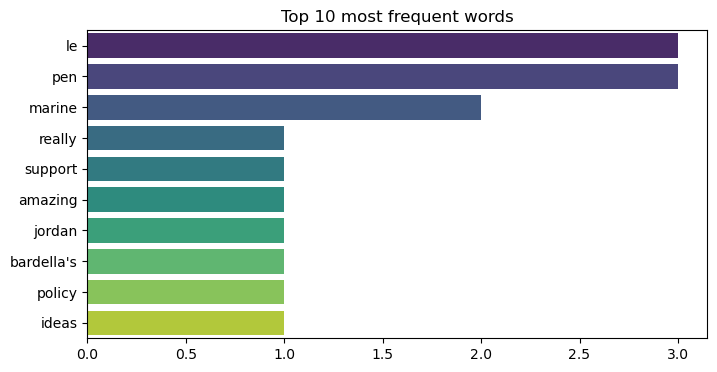

In [12]:
from collections import Counter

# todas las palabras
all_words = " ".join(df["clean_text"]).split()
word_freq = Counter(all_words)

# top 10
top_words = word_freq.most_common(10)
print("Top 10 words:", top_words)

# gráfico
words, counts = zip(*top_words)
plt.figure(figsize=(8,4))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("Top 10 most frequent words")
plt.show()

In [ ]:
## This code is not working correctly right now, needs more adjustments
## maybe it would be useful to replace politician names with ids as said before
# look in the annexe

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorizar textos
vectorizer = CountVectorizer(max_df=0.9, min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(df["clean_text"])

# LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)

# mostrar temas
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[-no_top_words:]])

display_topics(lda, vectorizer.get_feature_names_out(), 5)

Topic 1:  ['stand', 'awful', 'inexperienced', 'competent', 'bardella']
Topic 2:  ['amazing', 'support', 'marine', 'le', 'pen']


In [18]:
## first test with a real database

# instalar paquete kaggle
%pip install kaggle

# si no pusiste kaggle.json en la carpeta .kaggle, podés crearlo desde el notebook
import os
os.environ['KAGGLE_USERNAME'] = "micagonzdark"
os.environ['KAGGLE_KEY'] = "KGAT_05bd047ca761b82b1f5eeb06f22690cd"

from kaggle.api.kaggle_api_extended import KaggleApi

# crear carpeta data si no existe
os.makedirs("data", exist_ok=True)

# iniciar API
api = KaggleApi()
api.authenticate()

# descargar dataset completo (zip)
api.competition_download_files(
    "jigsaw-toxic-comment-classification-challenge",
    path="data"
)

# el archivo se llama algo así: jigsaw-toxic-comment-classification-challenge.zip



Note: you may need to restart the kernel to use updated packages.


HTTPError: 401 Client Error: Unauthorized for url: https://api.kaggle.com/v1/competitions.CompetitionApiService/DownloadDataFiles

In [ ]:
# descargamos el dataset completo (zip)
kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p ./data

# descomprimir
import zipfile
with zipfile.ZipFile("./data/jigsaw-toxic-comment-classification-challenge.zip", 'r') as zip_ref:
    zip_ref.extractall("./data")

df_real = pd.read_csv("./data/train.csv")
df_real.head()

401 Client Error: Unauthorized for url: https://api.kaggle.com/v1/competitions.CompetitionApiService/DownloadDataFiles


FileNotFoundError: [Errno 2] No such file or directory: './data/jigsaw-toxic-comment-classification-challenge.zip'

# ANEXE

In [ ]:
# Basic text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s']", "", text)  # letters, spaces, '
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

stop_words = set(stopwords.words('english'))  # adjust if it's French

# Diccionario para unificar nombres de políticos
# clave: posible forma en el texto, valor: nombre único
politician_map = {
    'marine le pen': 'marine_le_pen',
    'le pen': 'marine_le_pen',
    'pen': 'marine_le_pen',
    
    'emmanuel macron': 'emmanuel_macron',
    'macron': 'emmanuel_macron',
    
    # agregá más políticos si hace falta
}

def replace_politicians(text):
    for key, value in politician_map.items():
        # reemplaza coincidencias exactas de la cadena
        # agregamos espacios delante y detrás para no confundir palabras
        pattern = r'\b' + re.escape(key) + r'\b'
        text = re.sub(pattern, value, text)
    return text

def simple_tokenize(text):
    return text.split()

def preprocess_text(text):
    text = clean_text(text)
    text = replace_politicians(text)  # primero normalizamos nombres
    tokens = text.split()  # simple tokenize
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

# aplicar al dataframe
df["clean_text"] = df["text"].apply(preprocess_text)
df[["text", "clean_text"]]
